In [14]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## 1.IMPORTING DATA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')






In [81]:
stock_df = pd.read_csv('/kaggle/input/tesla-stock-data-updated-till-28jun2021/TSLA.csv')
stock_df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


## 2.ANALYSING DATA

In [82]:
stock_df.shape

(2956, 7)

In [83]:
stock_df.describe()


,Open,High,Low,Close,Adj Close,Volume
count,2956.000000,2956.000000,2956.000000,2956.000000,2956.000000,2.956000e+03
mean,138.691296,141.771603,135.425953,138.762183,138.762183,3.131449e+07
std,250.044839,255.863239,243.774157,250.123115,250.123115,2.798383e+07
min,3.228000,3.326000,2.996000,3.160000,3.160000,5.925000e+05
25%,19.627000,20.402000,19.127500,19.615000,19.615000,1.310288e+07
50%,46.656999,47.487001,45.820002,46.545000,46.545000,2.488680e+07
75%,68.057001,69.357500,66.911501,68.103998,68.103998,3.973875e+07
max,1234.410034,1243.489990,1217.000000,1229.910034,1229.910034,3.046940e+08


In [84]:
stock_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2956 entries, 0 to 2955
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2956 non-null   object 
 1   Open       2956 non-null   float64
 2   High       2956 non-null   float64
 3   Low        2956 non-null   float64
 4   Close      2956 non-null   float64
 5   Adj Close  2956 non-null   float64
 6   Volume     2956 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 161.8+ KB


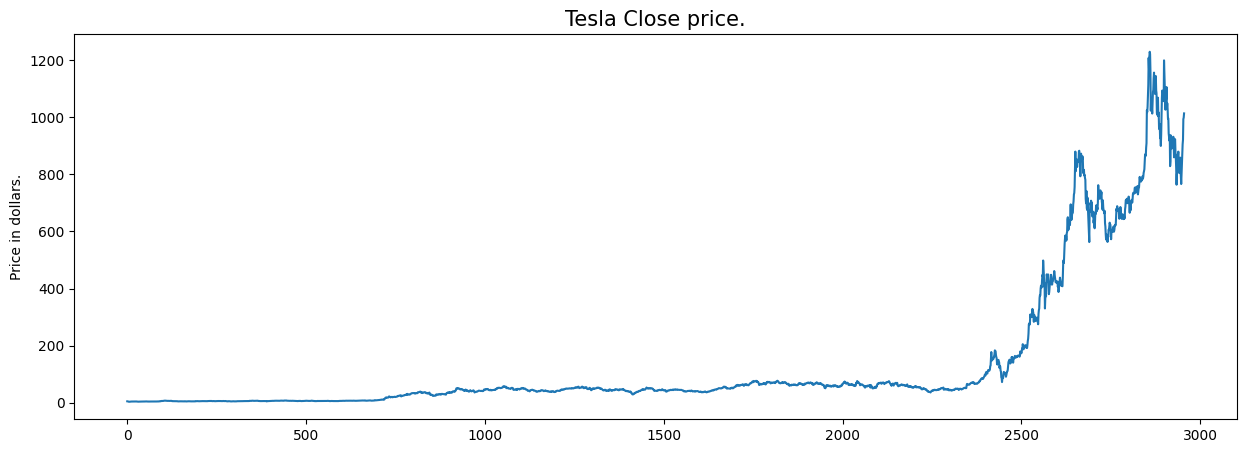

In [7]:
plt.figure(figsize=(15,5))
plt.plot(df['Close'])
plt.title('Tesla Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()

In [85]:
stock_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


## 3.CLEANING DATA

In [86]:
stock_df[stock_df['Close'] == stock_df['Adj Close']].shape

(2956, 7)

In [87]:
stock_df = stock_df.drop(['Adj Close'], axis=1)

In [88]:
stock_df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

## 4.DATA VISUALISATION

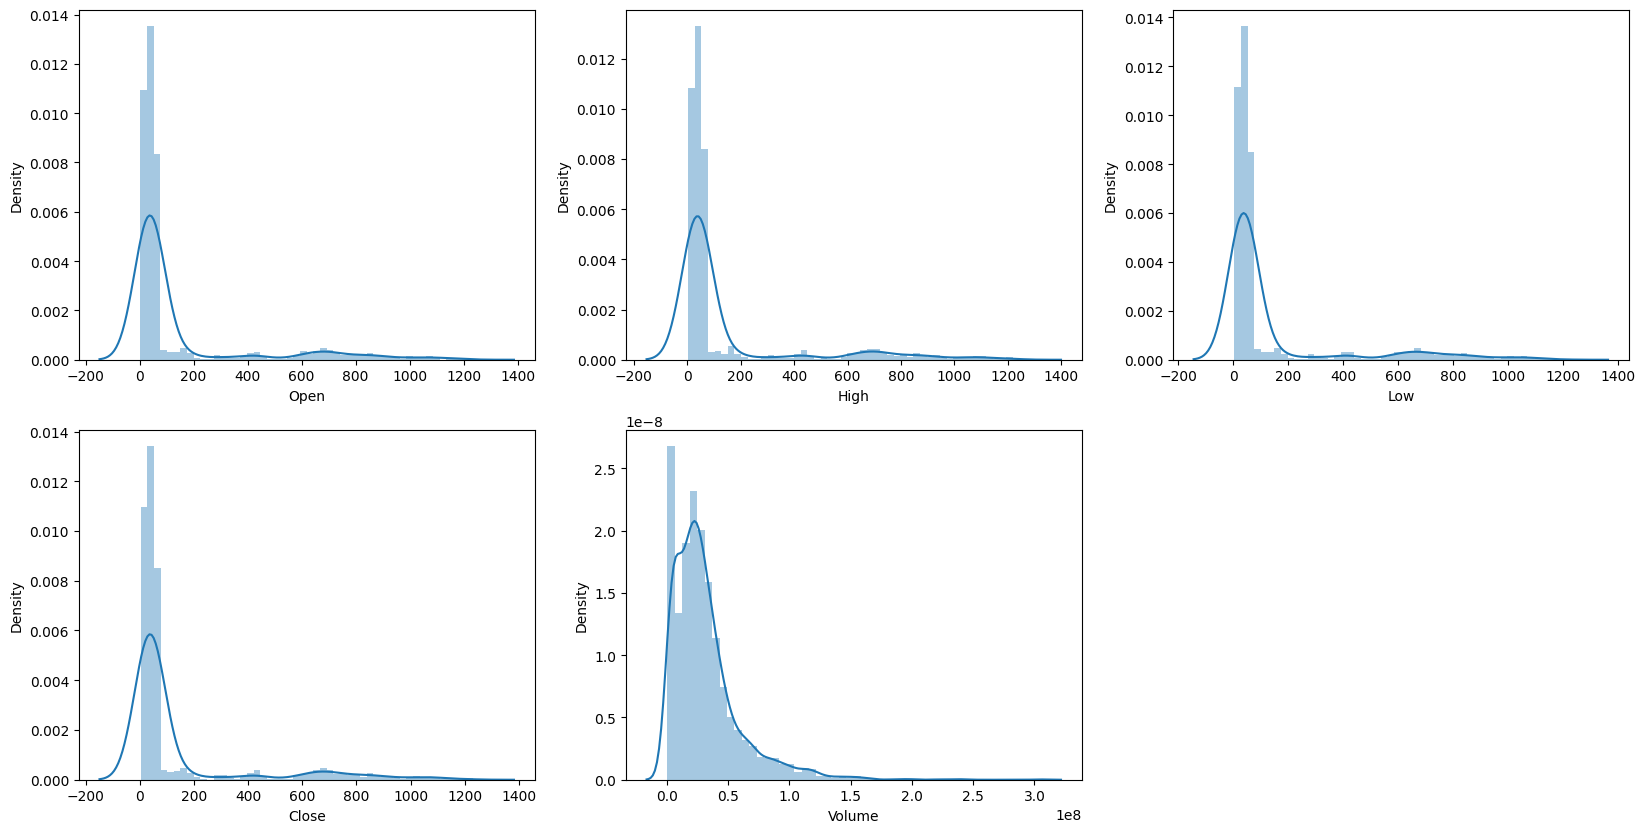

In [12]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']
 
plt.subplots(figsize=(20,10))
 
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.distplot(df[col])
plt.show()

In [138]:
df['open-close'] = df['Open'] - df['Close']
df['low-high'] = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

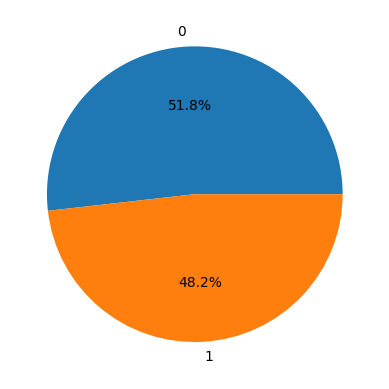

In [139]:
plt.pie(df['target'].value_counts().values,labels=[0, 1], autopct='%1.1f%%')
plt.show()

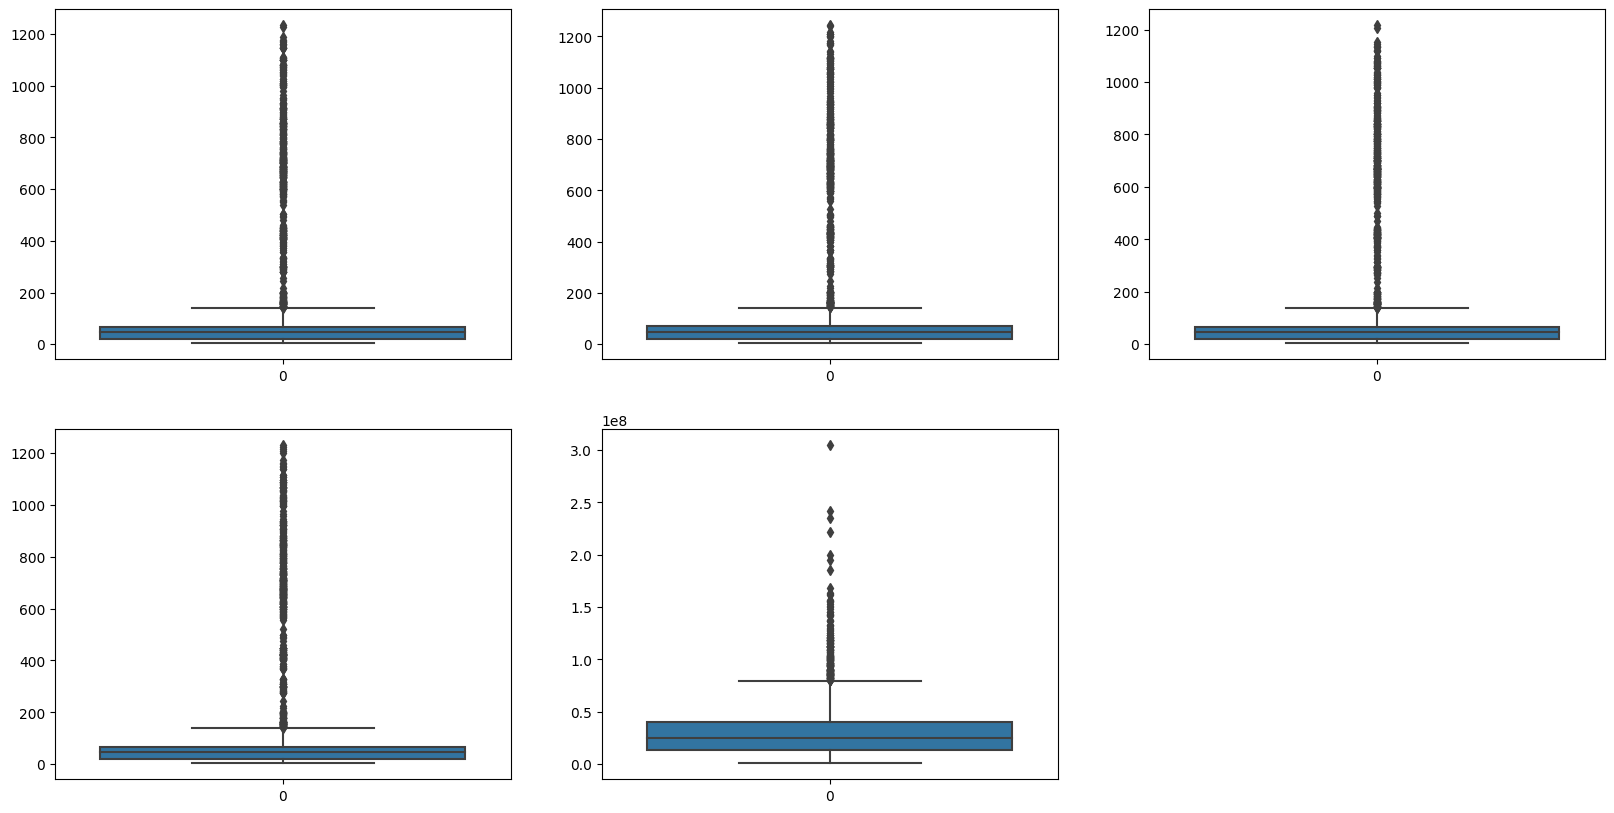

In [13]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.boxplot(df[col])
plt.show()

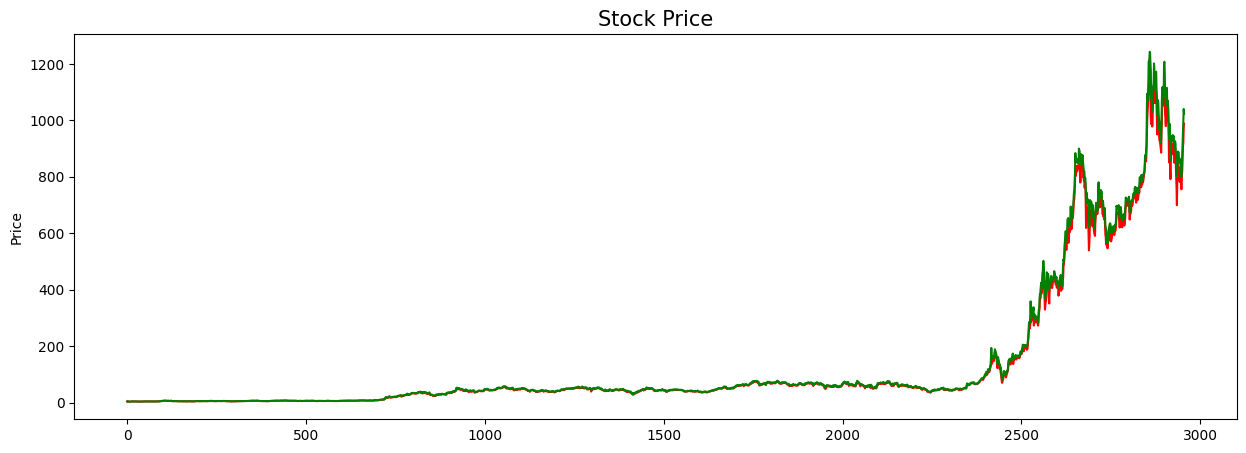

In [29]:
plt.figure(figsize=(15,5))
plt.plot(df['Low'],color="red",label='Low')
plt.plot(df['High'],color="green",label='High')
plt.title('Stock Price', fontsize=15)

plt.ylabel('Price')
plt.show()

In [89]:
stock_df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [90]:
stock_df.isna().any()

Date      False
Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

In [91]:
stock_df.duplicated().sum()

0

In [92]:
stock_df.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
dtype: object

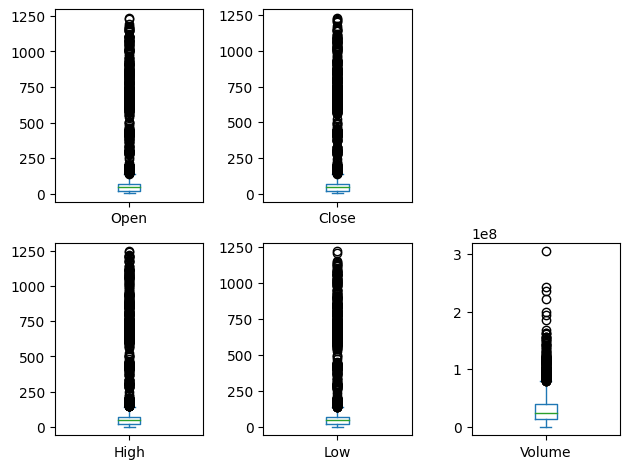

In [93]:
plt.subplot(2,3,1)
stock_df['Open'].plot(kind='box') 

plt.subplot(2,3,2)
stock_df['Close'].plot(kind='box')

plt.subplot(2,3,4)
stock_df['High'].plot(kind='box')

plt.subplot(2,3,5)
stock_df['Low'].plot(kind='box')

plt.subplot(2,3,6)
stock_df['Volume'].plot(kind='box')

plt.tight_layout()


<Axes: >

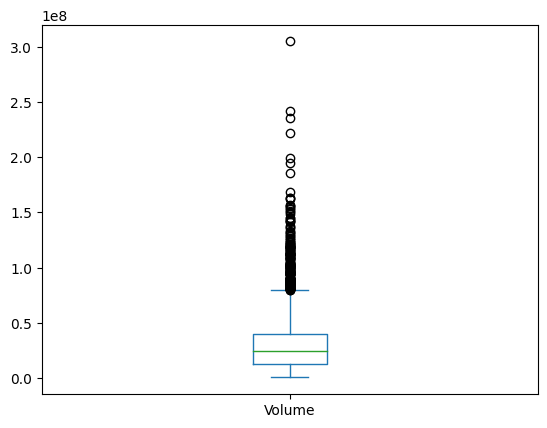

In [94]:
stock_df['Volume'].plot(kind='box')

In [48]:
def find_outlier_limits(col_name):
    Q1,Q3=df[col_name].quantile([.25,.75])
    IQR=Q3-Q1
    low=Q1-(2* IQR)
    high=Q3+(1* IQR)
    return (high,low)

high_vol,low_vol=find_outlier_limits('Volume')
print('Volume: ','upper limit: ',high_vol,' lower limit: ',low_vol)

Volume:  upper limit:  66374625.0  lower limit:  -40168875.0


In [49]:
low_limit = 0
print('Volume: ','upper limit: ','lower limit: ',low_limit)

Volume:  upper limit:  lower limit:  0


In [95]:
stock_df.loc[df['Volume'] > high_vol,'Volume'] = high_vol

stock_df.loc[df['Volume']>high_vol,'Volume']=high_vol

<Axes: >

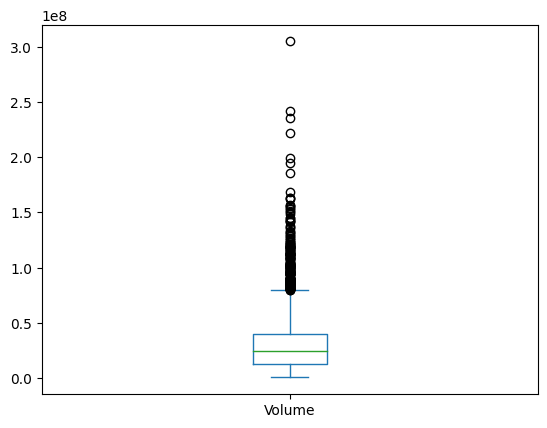

In [96]:
stock_df['Volume'].plot(kind='box')

In [97]:
outliers = [stock_df['Volume'] > high_vol,'Volume']
outliers[True]

'Volume'

In [98]:
stock_df

,Date,Open,High,Low,Close,Volume
0,2010-06-29,3.800000,5.000000,3.508000,4.778000,93831500
1,2010-06-30,5.158000,6.084000,4.660000,4.766000,85935500
2,2010-07-01,5.000000,5.184000,4.054000,4.392000,41094000
3,2010-07-02,4.600000,4.620000,3.742000,3.840000,25699000
4,2010-07-06,4.000000,4.000000,3.166000,3.222000,34334500
...,...,...,...,...,...,...
2951,2022-03-18,874.489990,907.849976,867.390015,905.390015,33408500
2952,2022-03-21,914.979980,942.849976,907.090027,921.159973,27327200
2953,2022-03-22,930.000000,997.859985,921.750000,993.979980,35289500
2954,2022-03-23,979.940002,1040.699951,976.400024,999.109985,40225400


In [99]:
X =stock_df.iloc[:, 1:8]
X = pd.get_dummies(X)
X

,Open,High,Low,Close,Volume
0,3.800000,5.000000,3.508000,4.778000,93831500
1,5.158000,6.084000,4.660000,4.766000,85935500
2,5.000000,5.184000,4.054000,4.392000,41094000
3,4.600000,4.620000,3.742000,3.840000,25699000
4,4.000000,4.000000,3.166000,3.222000,34334500
...,...,...,...,...,...
2951,874.489990,907.849976,867.390015,905.390015,33408500
2952,914.979980,942.849976,907.090027,921.159973,27327200
2953,930.000000,997.859985,921.750000,993.979980,35289500
2954,979.940002,1040.699951,976.400024,999.109985,40225400


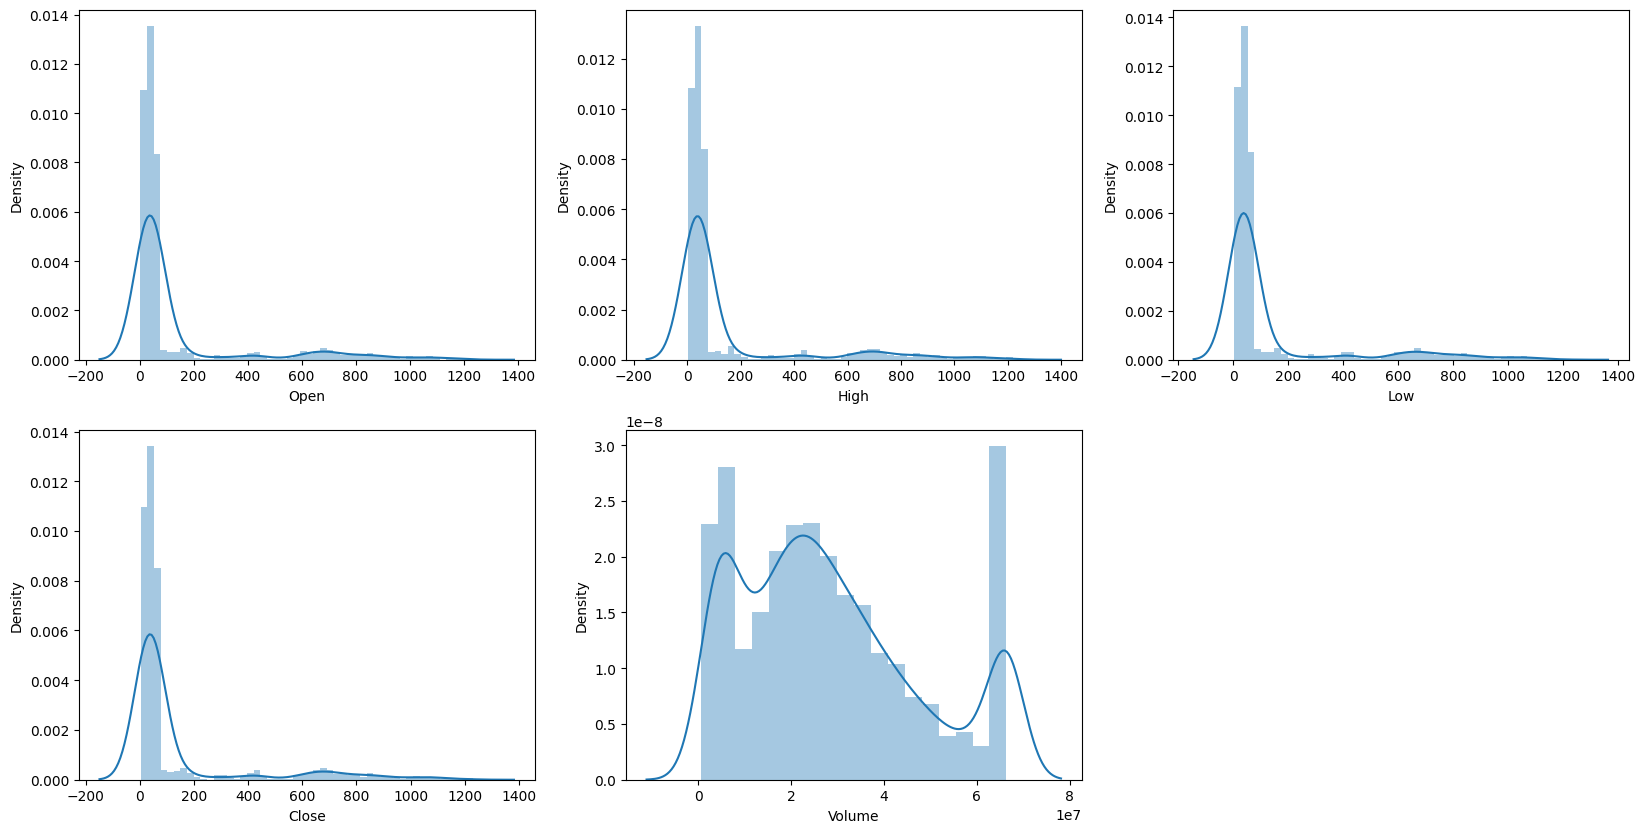

In [68]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']
 
plt.subplots(figsize=(20,10))
 
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.distplot(df[col])
plt.show()


In [100]:
splitted = stock_df['Date'].str.split('-', expand=True)
 
stock_df['month'] = splitted[1].astype('int')
stock_df['year'] = splitted[0].astype('int')
stock_df['date'] = splitted[2].astype('int')
 
stock_df.head()

,Date,Open,High,Low,Close,Volume,month,year,date
0,2010-06-29,3.800,5.000,3.508,4.778,93831500,6,2010,29
1,2010-06-30,5.158,6.084,4.660,4.766,85935500,6,2010,30
2,2010-07-01,5.000,5.184,4.054,4.392,41094000,7,2010,1
3,2010-07-02,4.600,4.620,3.742,3.840,25699000,7,2010,2
4,2010-07-06,4.000,4.000,3.166,3.222,34334500,7,2010,6


In [101]:
stock_df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
stock_df.head()

,Date,Open,High,Low,Close,Volume,month,year,date,is_quarter_end
0,2010-06-29,3.800,5.000,3.508,4.778,93831500,6,2010,29,1
1,2010-06-30,5.158,6.084,4.660,4.766,85935500,6,2010,30,1
2,2010-07-01,5.000,5.184,4.054,4.392,41094000,7,2010,1,0
3,2010-07-02,4.600,4.620,3.742,3.840,25699000,7,2010,2,0
4,2010-07-06,4.000,4.000,3.166,3.222,34334500,7,2010,6,0


## 5.DATA PREPROCESSING

In [114]:
dataset = df["Close"]
dataset = pd.DataFrame(dataset)

data = dataset.values

data.shape

(2956, 1)

## 6.NORMALIZING DATA 

In [119]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range= (0, 1))
scaled_data = scaler.fit_transform(np.array(data).reshape(-1, 1))

## 7.SPLITTING DATA

In [117]:
train_size = int(len(data)*.75)
test_size = len(data) - train_size

print("Train Size :",train_size,"Test Size :",test_size)

train_data = scaled_data[ :train_size , 0:1 ]
test_data = scaled_data[ train_size-60: , 0:1 ]

Train Size : 2217 Test Size : 739


## 8.CREATING  TRAINING DATASET

In [121]:
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

In [122]:
x_test = []
y_test = []

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    y_test.append(test_data[i, 0])
x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test.shape , y_test.shape

((739, 60, 1), (739,))

In [124]:
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
# Convert to numpy array
x_train, y_train = np.array(x_train), np.array(y_train)
# Reshaping the input
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape , y_train.shape

((2157, 60, 1), (2157,))

In [126]:
import keras
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Dense, LSTM, Dropout

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

## 9. LSTM MODEL

In [127]:
model = Sequential([
    LSTM(50, return_sequences= True, input_shape= (x_train.shape[1], 1)),
    LSTM(64, return_sequences= False),
    Dense(32),
    Dense(16),
    Dense(1)
])

model.compile(optimizer= 'adam', loss= 'mse' , metrics= "mean_absolute_error")

In [128]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 64)                29440     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 42,465
Trainable params: 42,465
Non-trainable params: 0
_________________________________________________________________


## 10. MODEL TRAINING

In [129]:
callbacks = [EarlyStopping(monitor= 'loss', patience= 10 , restore_best_weights= True)]
history = model.fit(x_train, y_train, epochs= 100, batch_size= 32 , callbacks= callbacks )


Epoch 1/100
68/68 [==============================] - 8s 58ms/step - loss: 7.4590e-05 - mean_absolute_error: 0.0054
Epoch 2/100
68/68 [==============================] - 4s 58ms/step - loss: 5.4174e-06 - mean_absolute_error: 0.0017
Epoch 3/100
68/68 [==============================] - 4s 58ms/step - loss: 5.5916e-06 - mean_absolute_error: 0.0017
Epoch 4/100
68/68 [==============================] - 4s 60ms/step - loss: 6.0617e-06 - mean_absolute_error: 0.0019
Epoch 5/100
68/68 [==============================] - 4s 59ms/step - loss: 5.4091e-06 - mean_absolute_error: 0.0017
Epoch 6/100
68/68 [==============================] - 4s 60ms/step - loss: 4.9544e-06 - mean_absolute_error: 0.0017
Epoch 7/100
68/68 [==============================] - 4s 58ms/step - loss: 5.3309e-06 - mean_absolute_error: 0.0018
Epoch 8/100
68/68 [==============================] - 4s 57ms/step - loss: 4.4736e-06 - mean_absolute_error: 0.0016
Epoch 9/100
68/68 [==============================] - 4s 58ms/step - loss: 4.2711

## 11.MODEL EVALUATION

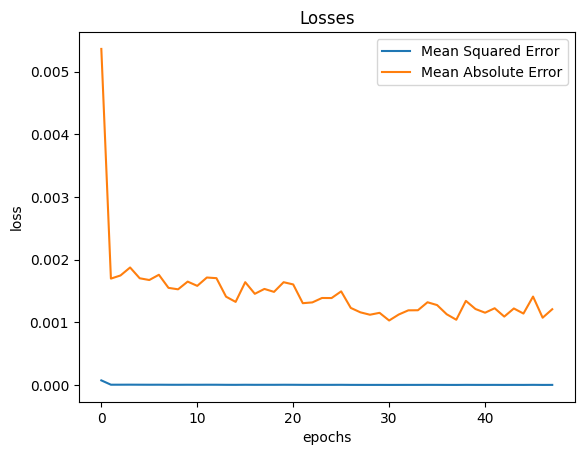

In [130]:
plt.plot(history.history["loss"])
plt.plot(history.history["mean_absolute_error"])
plt.legend(['Mean Squared Error','Mean Absolute Error'])
plt.title("Losses")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

## 12.PREDICTION

In [131]:
x_test = []
y_test = []

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    y_test.append(test_data[i, 0])
x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test.shape , y_test.shape

((739, 60, 1), (739,))

## 13.ROOT MEAN SQUARE ERROR

In [ ]:
y_test = scaler.inverse_transform([y_test])

RMSE = np.sqrt(np.mean( y_test - predictions )**2).round(2)
RMSE

## 14.Visualize Predictions with The Data

In [141]:
train = dataset.iloc[:train_size , 0:1]
test = dataset.iloc[train_size: , 0:1]
test['Predictions'] = predictions

plt.figure(figsize= (16, 6))
plt.title('Tesla Close Stock Price Prediction', fontsize= 18)
plt.xlabel('Date', fontsize= 18)
plt.ylabel('Close Price', fontsize= 18)
plt.plot(train['Close'], linewidth= 3)
plt.plot(test['Close'], linewidth= 3)
plt.plot(test["Predictions"], linewidth= 3)
plt.legend(['Train', 'Test', 'Predictions'])

NameError: name 'predictions' is not defined

## 14.Forecast Next 30 Days

In [133]:
from datetime import timedelta
def insert_end(Xin, new_input):
    timestep = 60
    for i in range(timestep - 1):
        Xin[:, i, :] = Xin[:, i+1, :]
    Xin[:, timestep - 1, :] = new_input
    return Xin
future = 30
forcast = []
Xin = x_test[-1 :, :, :]
time = []
for i in range(0, future):
    out = model.predict(Xin, batch_size=5)
    forcast.append(out[0, 0]) 
    print(forcast)
    Xin = insert_end(Xin, out[0, 0]) 
    time.append(pd.to_datetime(df.index[-1]) + timedelta(days=i))


1/1 [==============================] - 0s 35ms/step
[0.73146564]
1/1 [==============================] - 0s 32ms/step
[0.73146564, 0.72180367]
1/1 [==============================] - 0s 30ms/step
[0.73146564, 0.72180367, 0.699777]
1/1 [==============================] - 0s 33ms/step
[0.73146564, 0.72180367, 0.699777, 0.6728486]
1/1 [==============================] - 0s 34ms/step
[0.73146564, 0.72180367, 0.699777, 0.6728486, 0.64416903]
1/1 [==============================] - 0s 33ms/step
[0.73146564, 0.72180367, 0.699777, 0.6728486, 0.64416903, 0.61538064]
1/1 [==============================] - 0s 31ms/step
[0.73146564, 0.72180367, 0.699777, 0.6728486, 0.64416903, 0.61538064, 0.5875089]
1/1 [==============================] - 0s 36ms/step
[0.73146564, 0.72180367, 0.699777, 0.6728486, 0.64416903, 0.61538064, 0.5875089, 0.56125003]
1/1 [==============================] - 0s 28ms/step
[0.73146564, 0.72180367, 0.699777, 0.6728486, 0.64416903, 0.61538064, 0.5875089, 0.56125003, 0.5370663]
1/1 [==

In [134]:
time

[Timestamp('1970-01-01 00:00:00.000002955'),
 Timestamp('1970-01-02 00:00:00.000002955'),
 Timestamp('1970-01-03 00:00:00.000002955'),
 Timestamp('1970-01-04 00:00:00.000002955'),
 Timestamp('1970-01-05 00:00:00.000002955'),
 Timestamp('1970-01-06 00:00:00.000002955'),
 Timestamp('1970-01-07 00:00:00.000002955'),
 Timestamp('1970-01-08 00:00:00.000002955'),
 Timestamp('1970-01-09 00:00:00.000002955'),
 Timestamp('1970-01-10 00:00:00.000002955'),
 Timestamp('1970-01-11 00:00:00.000002955'),
 Timestamp('1970-01-12 00:00:00.000002955'),
 Timestamp('1970-01-13 00:00:00.000002955'),
 Timestamp('1970-01-14 00:00:00.000002955'),
 Timestamp('1970-01-15 00:00:00.000002955'),
 Timestamp('1970-01-16 00:00:00.000002955'),
 Timestamp('1970-01-17 00:00:00.000002955'),
 Timestamp('1970-01-18 00:00:00.000002955'),
 Timestamp('1970-01-19 00:00:00.000002955'),
 Timestamp('1970-01-20 00:00:00.000002955'),
 Timestamp('1970-01-21 00:00:00.000002955'),
 Timestamp('1970-01-22 00:00:00.000002955'),
 Timestamp

## 15.Create forecasted dataframe

In [135]:
forcasted_output = np.asanyarray(forcast)   
forcasted_output = forcasted_output.reshape(-1, 1) 
forcasted_output = scaler.inverse_transform(forcasted_output) 
forcasted_output = pd.DataFrame(forcasted_output)
date = pd.DataFrame(time)
df_result = pd.concat([date,forcasted_output], axis=1)
df_result.columns = "Date", "Forecasted"

## 16.Forecasted tesla close price

In [136]:
df_result

,Date,Forecasted
0,1970-01-01 00:00:00.000002955,900.485535
1,1970-01-02 00:00:00.000002955,888.632690
2,1970-01-03 00:00:00.000002955,861.611511
3,1970-01-04 00:00:00.000002955,828.577026
4,1970-01-05 00:00:00.000002955,793.394409
5,1970-01-06 00:00:00.000002955,758.078247
6,1970-01-07 00:00:00.000002955,723.886597
7,1970-01-08 00:00:00.000002955,691.673523
8,1970-01-09 00:00:00.000002955,662.006104
9,1970-01-10 00:00:00.000002955,635.213745


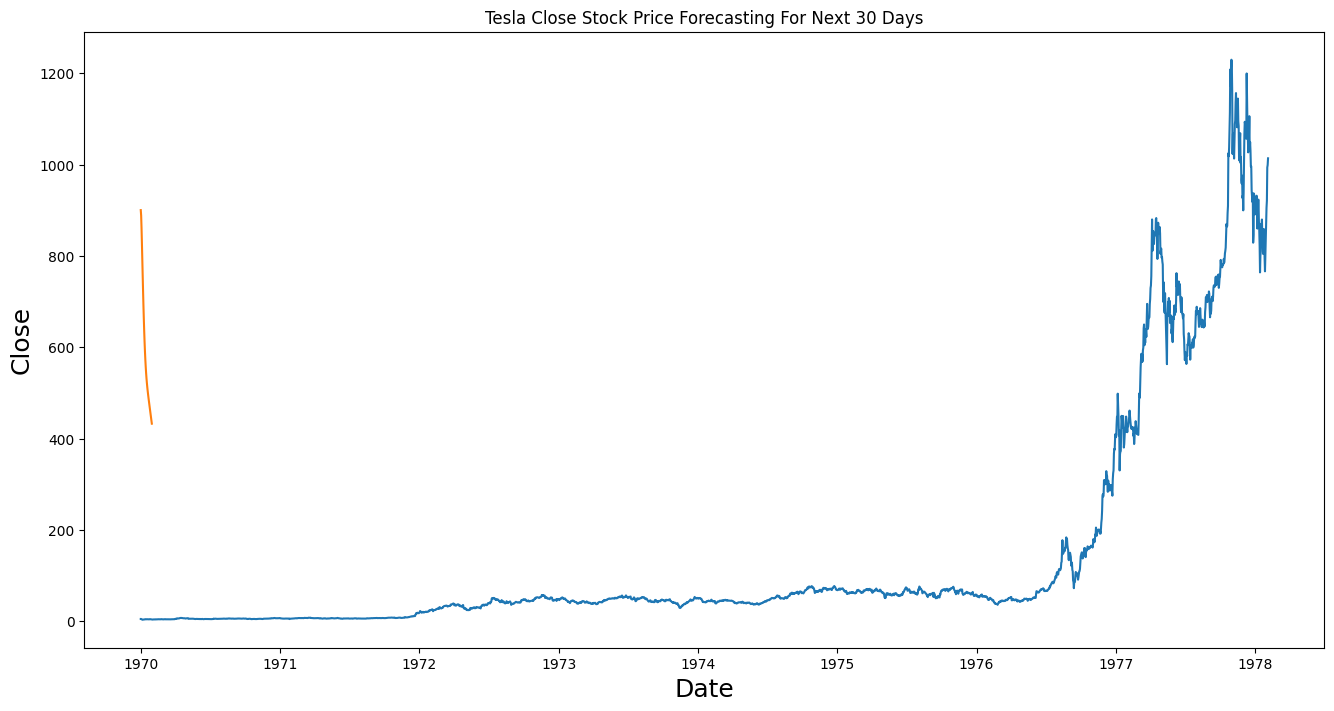

In [137]:
plt.figure(figsize=(16, 8))
plt.title('Tesla Close Stock Price Forecasting For Next 30 Days')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close' ,fontsize=18)
plt.plot(df['Close'])
plt.plot(df_result.set_index('Date')[['Forecasted']])